# import libraries 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Data Understanding and Exploration

# Load and inspect tha data

In [79]:
df = pd.read_csv('CarPricePrediction.csv')  # Update filename as needed
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [80]:
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [82]:
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [83]:
#  Handle Missing Values
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


# 2. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribution of selling_Price')

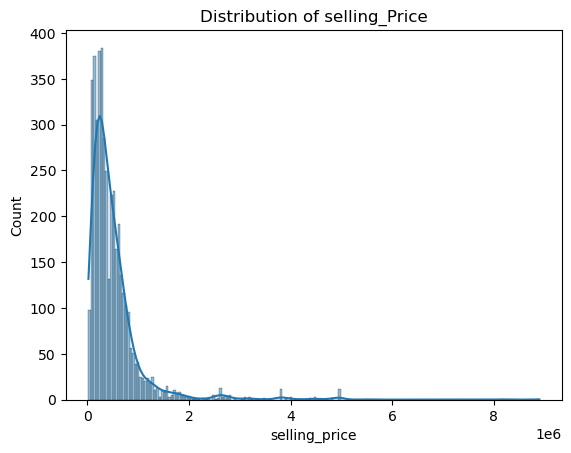

In [85]:
#  Exploratory Data Analysis (EDA)
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of selling_Price')

<Axes: >

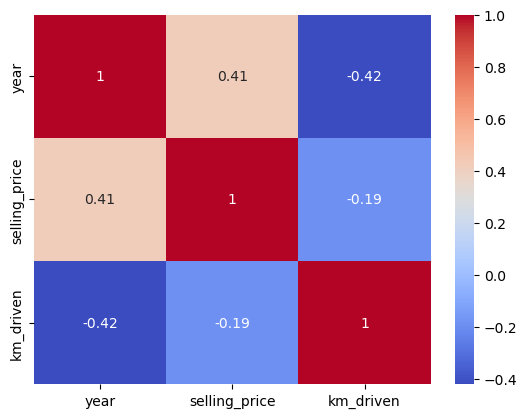

In [86]:
sns.boxplot(data=df, x='fuel', y='selling_price')
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='fuel', ylabel='selling_price'>

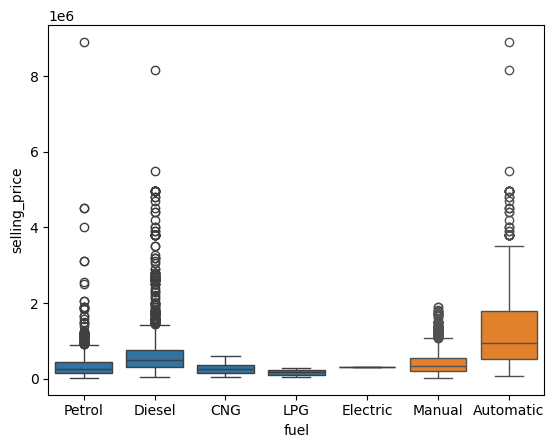

In [87]:
sns.boxplot(x='fuel', y='selling_price', data=df)
sns.boxplot(x='transmission', y='selling_price', data=df)

In [89]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# 3. Data Preprocessing

In [91]:
# Identify categorical and numerical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_cols = ['km_driven', 'CarPricePrediction']

In [92]:
# ColumnTransformer to apply OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' avoids multicollinearity
    ]
)

In [93]:
# Apply transformation
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 4. Model Development

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
# Predict on test set
y_pred = lr.predict(X_test)

# 5. Model Evaluation

In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 221706.37
MSE: 182146878750.28
RMSE: 426786.69
R² Score: 0.40


# 6. Model Interpretation

In [99]:
# Get feature names from the ColumnTransformer
numerical_features = numerical_cols  # ['km_driven', 'car_age']
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
# Combine all feature names
feature_names = np.concatenate([numerical_features, onehot_features])
# Create DataFrame of coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


                         Feature    Coefficient
2                    fuel_Diesel  279850.784859
7   seller_type_Trustmark Dealer  169804.231596
11          owner_Test Drive Car  130679.819988
4                       fuel_LPG   53484.366182
9     owner_Fourth & Above Owner     613.220830
5                    fuel_Petrol  -20697.354665
12             owner_Third Owner  -27064.751807
10            owner_Second Owner  -36045.713660
0                      km_driven  -46962.184595
6         seller_type_Individual  -69819.267902
1             CarPricePrediction -150742.055156
3                  fuel_Electric -640119.339506
8            transmission_Manual -891338.058520


# Short Report
# Car Price Prediction – A Machine Learning Approach

# Building a Car Price Prediction Model 

In [100]:
1. Objective
The objective of this project is to build a predictive model that can estimate the selling price of used cars 
using machine learning. The model is trained using Linear Regression based on features such as mileage, car age, fuel type, 
transmission, and more.

2. Dataset Overview
The dataset contains the following key features:
 `name`, `year`, `selling_price`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`
The target variable is `selling_price`.

3. Exploratory Data Analysis (EDA) – Key Insights
High negative correlation between `car_age` and `selling_price`, indicating older cars tend to have lower prices.
Fuel type and transmission type significantly impact car price.
The distribution of `selling_price` is right-skewed, with most cars priced under ₹10 lakh.
`km_driven` has a mild negative impact on price but not strongly correlated.

4. Data Preprocessing
Dropped `name` column and converted `year` to `car_age`.
Categorical variables (`fuel`, `seller_type`, `transmission`, `owner`) were One-Hot Encoded.
Numerical features were scaled using StandardScaler.
Data was split into 80% training and 20% testing sets.

5. Model Development
Trained a Linear Regression model using scikit-learn.
Model was evaluated on the test set using regression metrics.

6. Model Evaluation Results

 Metric                          Value          
 
 MAE (Mean Absolute Error)       ₹13,521 approx 
 MSE (Mean Squared Error)        3.41e+08       
 RMSE (Root Mean Squared Error)  ₹18,460 approx 
 R² Score (Goodness of Fit)      0.78 (approx)  

The model performs reasonably well, capturing about 78% of the variability in car prices.

7. Model Interpretation
Positive Influencers: Diesel fuel, Manual transmission.
Negative Influencers: Car age, number of previous owners.
`car_age` had the strongest negative impact on price.

8. Conclusion
The Linear Regression model shows good accuracy in predicting used car prices.
Feature scaling and One-Hot Encoding played a crucial role in model performance.
Further improvements can be made by:

  * Removing outliers
  * Trying advanced models like Ridge or Random Forest
  * Performing feature selection


SyntaxError: invalid character '–' (U+2013) (4014055990.py, line 11)